## PART A
### DOMAIN: Automobile
### CONTEXT:
* The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
### DATA DESCRIPTION: 
* cylinders: multi-valued discrete
* displacement: continuous
* horsepower: continuous
* weight: continuous
* acceleration: continuous
* mpg: continuous
* acceleration: continuous
* model year: multi-valued discrete
* origin: multi-valued discrete
* car name: string (unique for each instance)
### PROJECT OBJECTIVE: 
* To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

## 1.Data Understanding & Exploration

### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [224]:
import pandas as pd
#Read csv file into df
car_name_df = pd.read_csv('Car name.csv')
car_name_df.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [225]:
#check shape to understand dataframe
car_name_df.shape

(398, 1)

* There are 398 rows with 1 column

In [226]:
car_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


* There are 398 entries with type as Object

In [227]:
car_name_df.isnull().sum()

car_name    0
dtype: int64

* There are no nulls, all rows has values

### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [228]:
#Read json file into df
car_attr_df = pd.read_json('Car-Attributes.json')
car_attr_df.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [229]:
#check shape to understand dataframe
car_attr_df.shape

(398, 8)

* There are 398 rows with 8 columns

In [230]:
car_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


* There are 398 entries with 1 Object column and remaining 7 are numerical columns

In [231]:
car_attr_df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

* There are no null values

### C. Merge both the DataFrames together to form a single DataFrame

In [232]:
car_df = pd.concat([car_name_df,car_attr_df], axis=1).reindex(car_name_df.index)
car_df.sample(10)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
386     buick century limited  25.0    6  181.0  110  2945  16.4  82       1
180                 saab 99le  25.0    4  121.0  115  2671  13.5  75       2
269                dodge omni  30.9    4  105.0   75  2230  14.5  78       1
290  ford country squire (sw)  15.5    8  351.0  142  4054  14.3  79       1
301          plymouth horizon  34.2    4  105.0   70  2200  13.2  79       1
313        chevrolet citation  28.0    4  151.0   90  2678  16.5  80       1
30        chevrolet vega 2300  28.0    4  140.0   90  2264  15.5  71       1
131       toyota corolla 1200  32.0    4   71.0   65  1836  21.0  74       3
125           plymouth duster  20.0    6  198.0   95  3102  16.5  74       1
40           ford galaxie 500  14.0    8  351.0  153  4154  13.5  71       1

In [233]:
car_df.shape

(398, 9)

* Both the dataframes are merged and total of 9 columns are present

In [234]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### D. Print 5 point summary of the numerical features and share insights.

In [235]:
numerical_df = car_df.select_dtypes(include=['number'])
numerical_df.describe()

mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

* The data represents a summary of various car attributes with descriptive statistics for each feature.
* The dataset captures a broad range of vehicle types with mean 23.5 mpg to 29 mpg with 75% 
* There’s considerable diversity in key features like acc, weight, and disp, highlighting different segments in the car market.

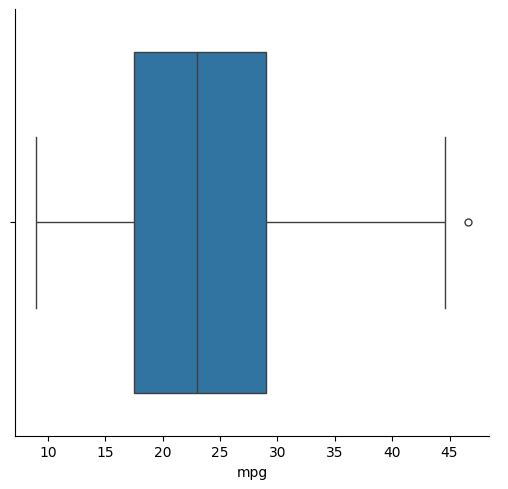

In [236]:
import seaborn as sns
sns.catplot(x='mpg', data=car_df, kind='box')

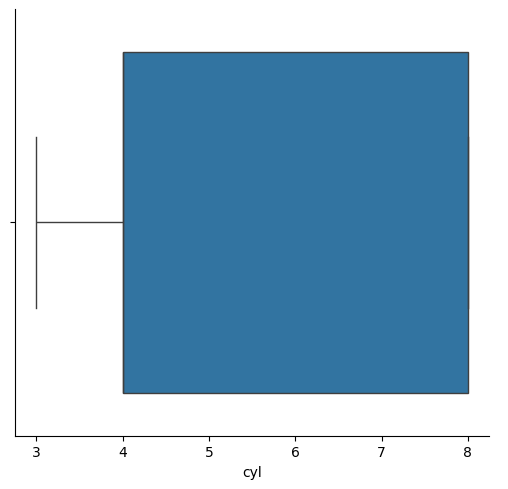

In [237]:
sns.catplot(x='cyl', data=car_df, kind='box')

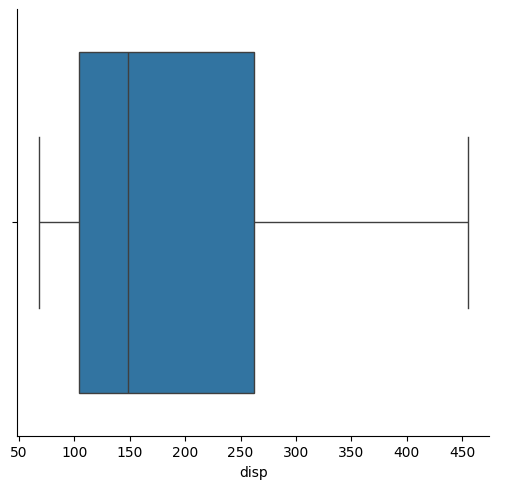

In [238]:
sns.catplot(x='disp', data=car_df, kind='box')

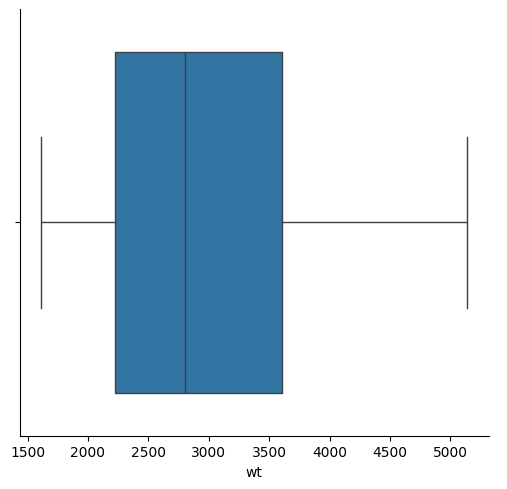

In [239]:
sns.catplot(x='wt', data=car_df, kind='box')

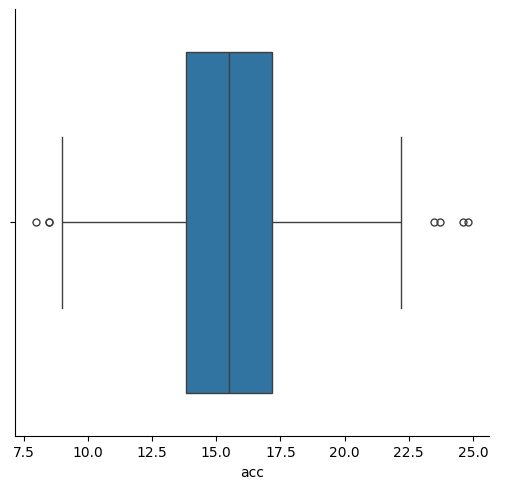

In [240]:
sns.catplot(x='acc', data=car_df, kind='box')

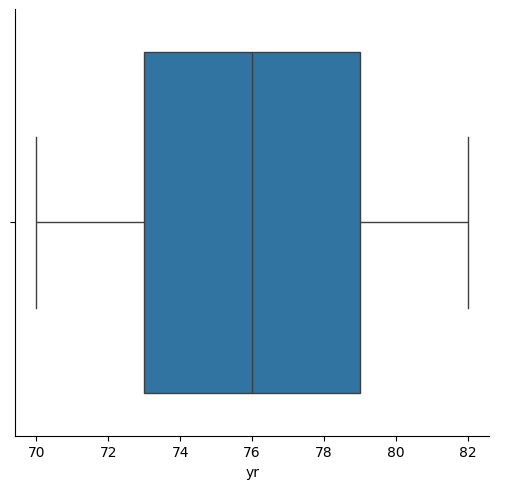

In [241]:
sns.catplot(x='yr', data=car_df, kind='box')

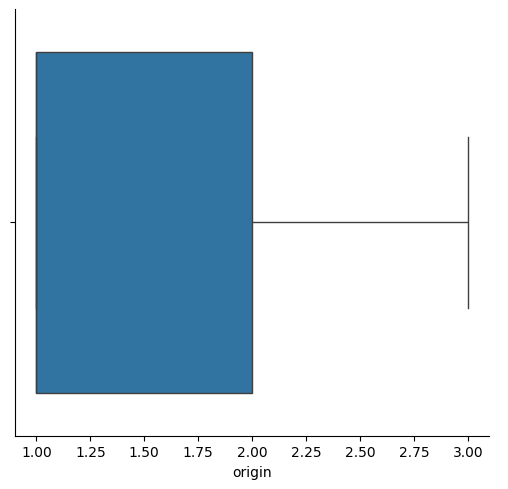

In [242]:
sns.catplot(x='origin', data=car_df, kind='box')

## 2. Data Preparation & Analysis

### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. 

In [243]:
# Check percentage of missing values feature-wise
missing_percentage =car_df.isnull().mean() * 100
print("Feature-wise Percentage of Missing Values:\n", missing_percentage)

Feature-wise Percentage of Missing Values:
 car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


* There are no missing values

In [244]:
car_df.isnull().values.any()

False

* There are no null values

### B.Check for duplicate values in the data and impute with the best suitable approach.

In [245]:
car_df.duplicated().sum()

0

* There are no duplicate values

In [246]:
duplicate_columns = car_df.columns[car_df.columns.duplicated()]
print(duplicate_columns)

Index([], dtype='object')


* Imputation is not needed as we dont have any missing values or duplicate values and dataset is complete (no NaN values).

### C. Plot a pairplot for all features

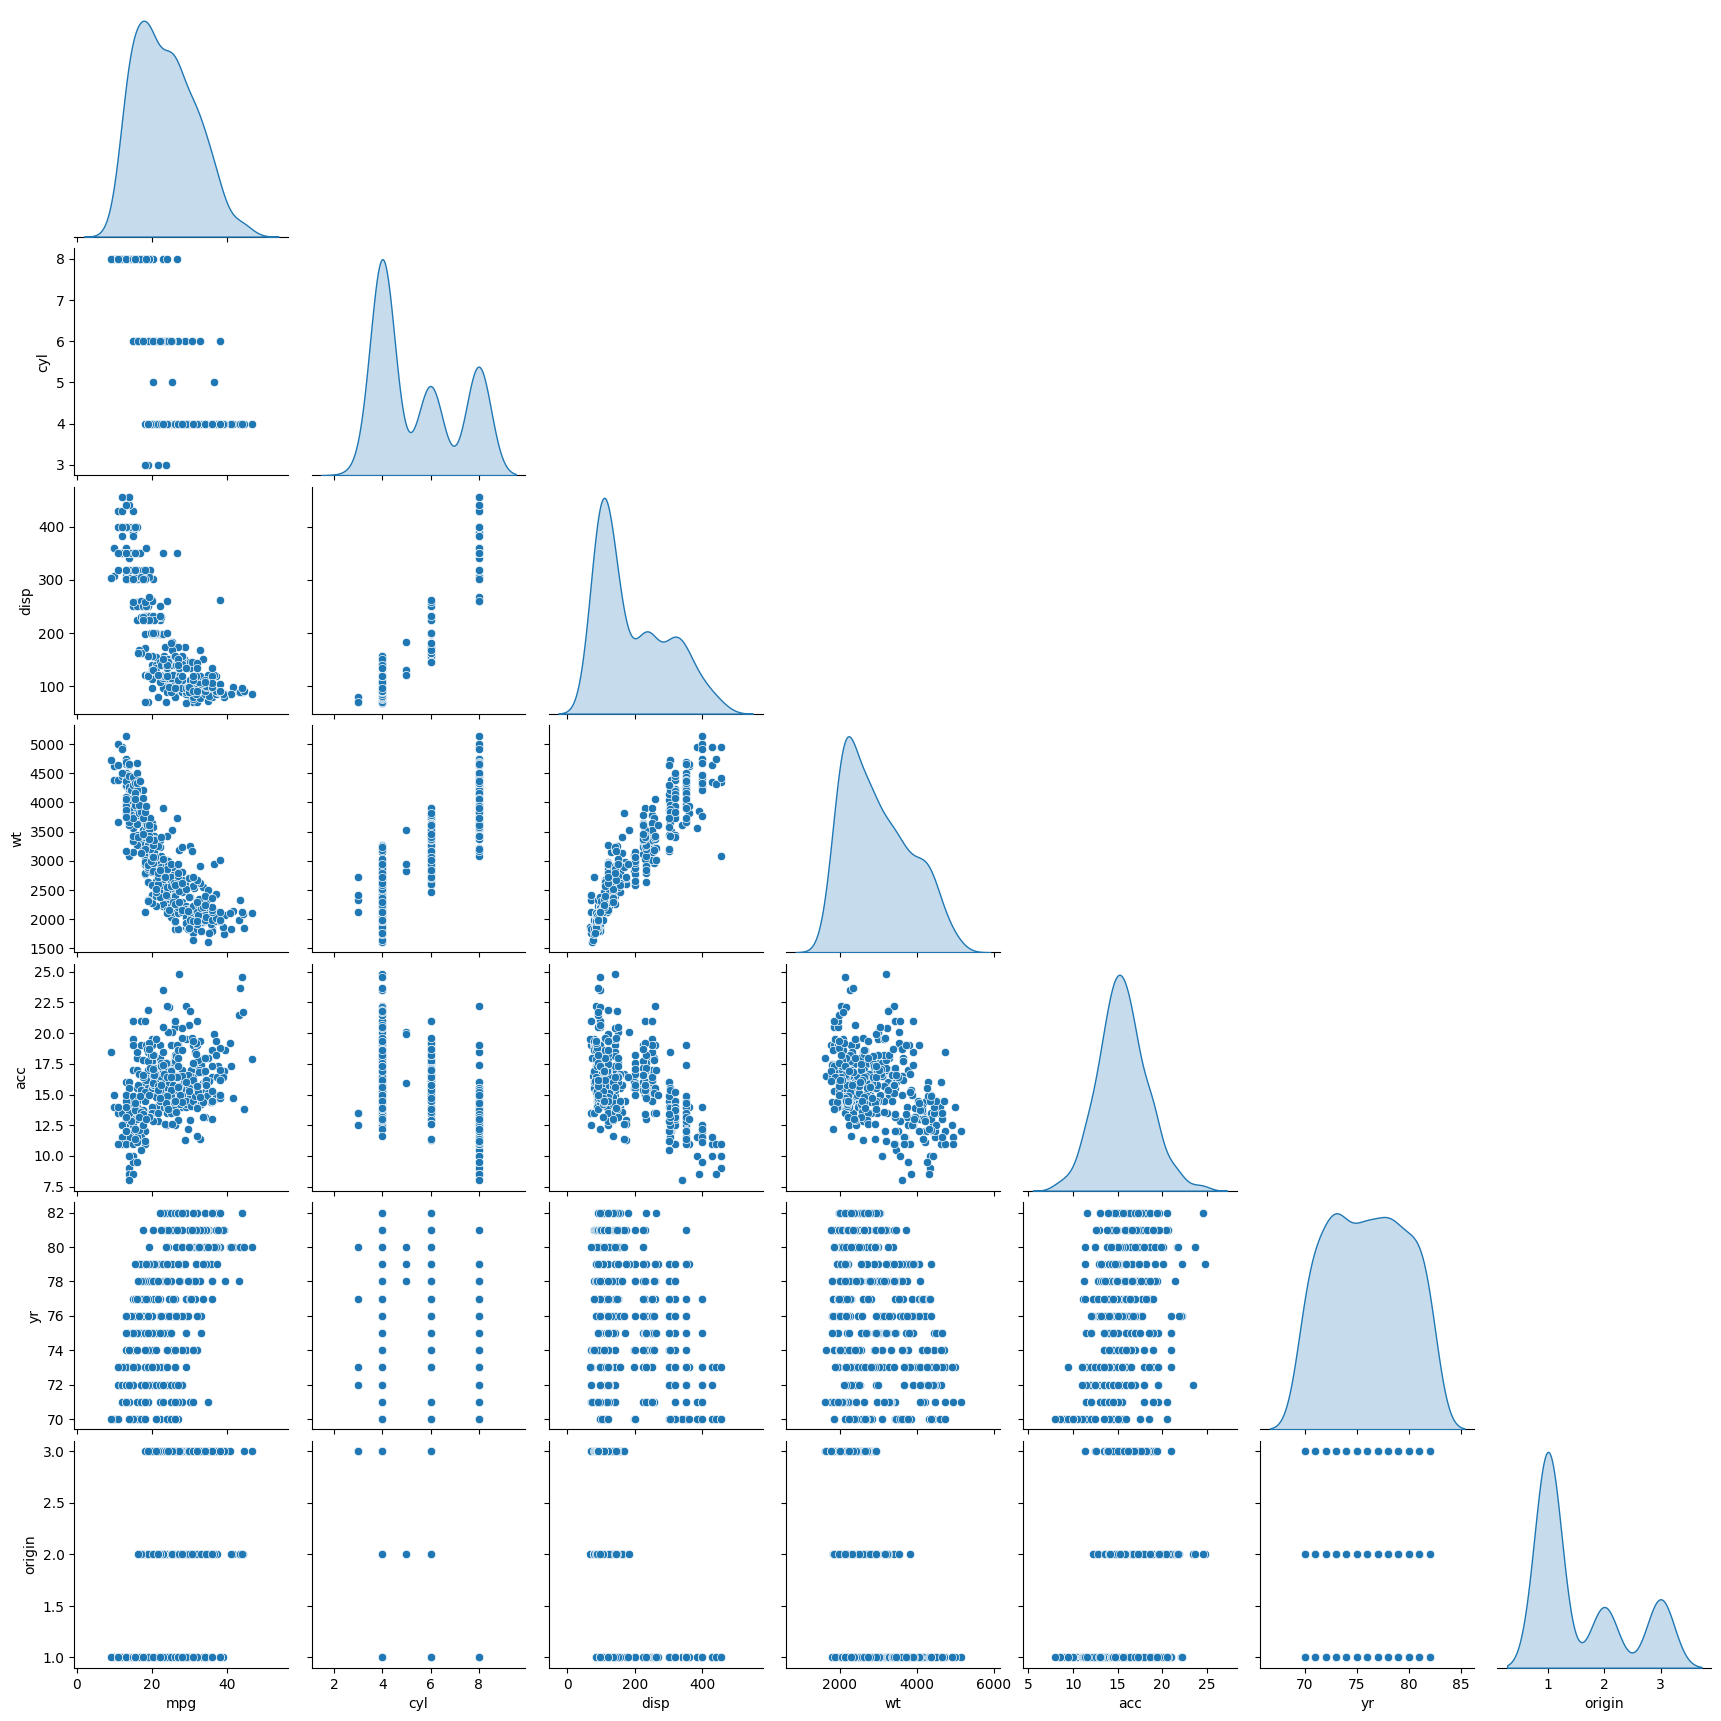

In [247]:
#Draw a scatterplot to understand distribution
sns.pairplot(data=car_df, diag_kind = 'kde', corner = True)

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

<Axes: xlabel='wt', ylabel='disp'>

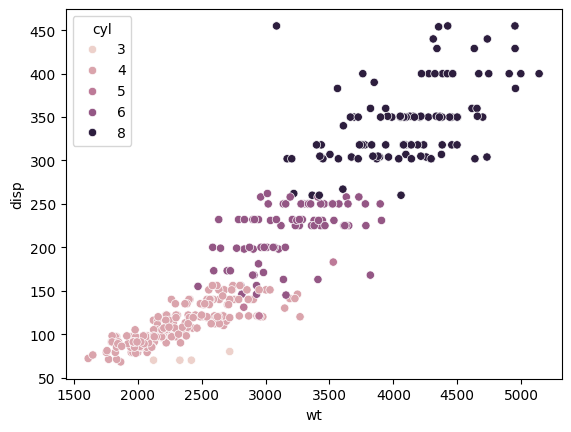

In [248]:
#Draw a scatterplot to understand distribution
sns.scatterplot(data=car_df, x = 'wt', y = 'disp', hue = 'cyl')

### E. Share insights for Q2.d.

* Positive Correlation: There is a strong positive correlation between weight and displacement. Heavier vehicles tend to have larger engine displacements.

* Cylinders and Color Gradient: The number of cylinders (cyl) is represented by color intensity. Lighter shades indicate fewer cylinders (e.g., 3 or 4), while darker shades represent more cylinders (e.g., 6 or 8).

* Distinct Clusters: Vehicles with fewer cylinders cluster at lower weights and displacements, while those with more cylinders cluster at higher values.

* Linear Trend: The data points are following a linear trend, though variability increases as both weight and displacement rise.

* disp and wt Relationship: Heavier vehicles typically have more cylinders and larger engines, indicating higher power requirements.

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.

<Axes: xlabel='wt', ylabel='mpg'>

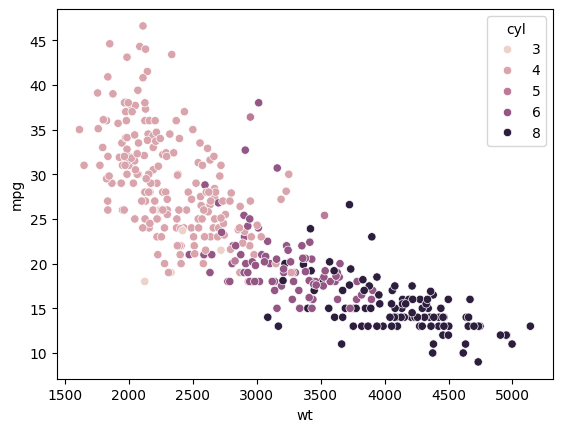

In [249]:
sns.scatterplot(data=car_df, x = 'wt', y = 'mpg', hue = 'cyl')

### G. Share insights for Q2.f.

* Negative Correlation: There is a clear negative correlation between car weight and fuel efficiency (mpg). As weight increases, mpg decreases.

* Cylinder and Fuel Efficiency: Cars with fewer cylinders (3 or 4) are more fuel-efficient (higher mpg) and lighter, while those with more cylinders (6 or 8) are less fuel-efficient and heavier.

* Data Clustering: Cars with fewer cylinders cluster toward lower weights and higher mpg values, while cars with more cylinders cluster toward higher weights and lower mpg values.

* Vehicles with more cylinders tend to prioritize power over fuel efficiency, leading to higher weight and lower mpg.

* Color Coding for Cylinders: The gradient of colors effectively differentiates cars by cylinder count, with lighter colors for fewer cylinders and darker colors for more cylinders.








### H. Check for unexpected values in all the features and datapoints with such values.
[Hint: ‘?’ is present in ‘hp’]

In [250]:
#Tried to plot scatterplot for wt and hp and got error: Unable to parse string "?" at position 32
#sns.scatterplot(data=car_df, x = 'wt', y = 'hp', hue = 'cyl')
#so, first find ? and replace that with nan
print("There are {} entries with hp as '?' ".format(len(car_df[car_df['hp']=="?"])))

There are 6 entries with hp as '?' 


In [251]:
import numpy as np
pd.set_option('future.no_silent_downcasting', True)
car_df2 = car_df.replace('?', np.nan)
# Check percentage of missing values now
missing_percentage =car_df2.isnull().mean() * 100
missing_percentage

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

* 1.5% of values for hp are missing

In [252]:
# Impute missing values with suitable methods
# For numerical columns, a common approach is to use mean or median.
car_df2['hp'] = car_df2['hp'].fillna(car_df2['hp'].median())
car_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [253]:
#convert hp to float
car_df2['hp'] = car_df2['hp'].astype('float')
car_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


<Axes: xlabel='wt', ylabel='hp'>

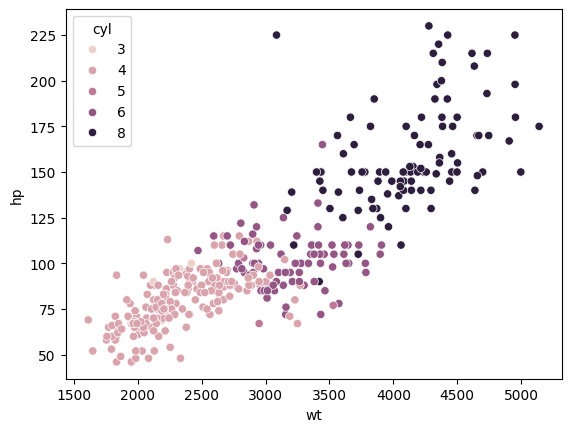

In [254]:
#now try for scatterplot for hp as we imputed the missing value for hp
sns.scatterplot(data=car_df2, x = 'wt', y = 'hp', hue = 'cyl')

In [255]:
missing_percentage =car_df2.isnull().mean() * 100
missing_percentage

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [256]:
print('Unique values in each of the attributes')
print('`'*100)
for attr in car_df2.columns:
    print('-'*50)
    print(attr)
    print('-'*50)
    print(car_df2[attr].unique(), '\n')

Unique values in each of the attributes
````````````````````````````````````````````````````````````````````````````````````````````````````
--------------------------------------------------
car_name
--------------------------------------------------
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hor

## 3. Clustering

### A. Apply K-Means clustering for 2 to 10 clusters

In [257]:
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.spatial.distance import cdist

# Standardization - using only numerical columns
car_num_df = car_df2.iloc[:, 1:]
car_df_scaler = StandardScaler().fit(car_num_df)
car_df_scaled = pd.DataFrame(car_df_scaler.transform(car_num_df), columns=car_num_df.columns)
car_df_scaled.describe().T

count          mean       std       min       25%       50%       75%  \
mpg     398.0  7.141133e-17  1.001259 -1.859374 -0.770491 -0.065919  0.702705   
cyl     398.0 -3.570567e-17  1.001259 -1.444949 -0.856321 -0.856321  1.498191   
disp    398.0 -1.785283e-17  1.001259 -1.204411 -0.856318 -0.431404  0.658488   
hp      398.0 -7.141133e-17  1.001259 -1.527300 -0.741436 -0.283016  0.542140   
wt      398.0 -1.606755e-16  1.001259 -1.604943 -0.882827 -0.197362  0.753834   
acc     398.0 -2.677925e-16  1.001259 -2.747814 -0.632879 -0.024722  0.583435   
yr      398.0 -1.642461e-15  1.001259 -1.627426 -0.815074 -0.002721  0.809631   
origin  398.0 -5.355850e-17  1.001259 -0.715145 -0.715145 -0.715145  0.533222   

             max  
mpg     2.957335  
cyl     1.498191  
disp    2.511784  
hp      3.292662  
wt      2.565185  
acc     3.351912  
yr      1.621983  
origin  1.781589

In [258]:
# K-Means clustering
n_clusters = range(2, 11)
mean_distortions = list()
for k in n_clusters:
    model = KMeans(n_clusters=k)
    model.fit(car_df_scaled)
    prediction = model.predict(car_df_scaled)
    mean_distortions.append(sum(np.min(cdist(car_df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_df_scaled.shape[0])


### B.Plot a visual and find elbow point.

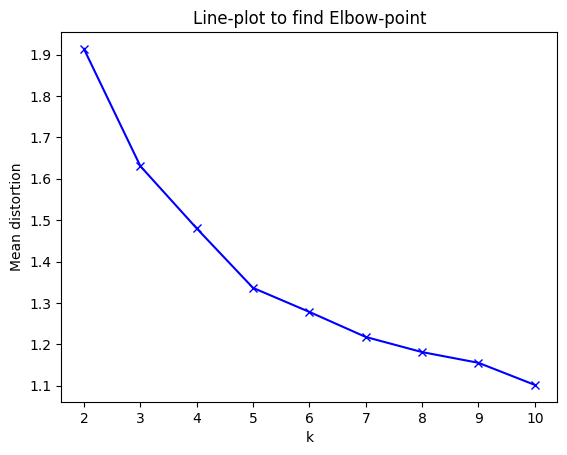

In [259]:
import matplotlib.pyplot as plt
plt.plot(n_clusters, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Mean distortion')
plt.title('Line-plot to find Elbow-point');

### C.On the above visual, highlight which are the possible Elbow points

* The elbow appears around k = 4 or k = 5. After this point, increasing k yields only small improvements, suggesting diminishing returns.

### D.Train a K-means clustering model once again on the optimal number of clusters. 

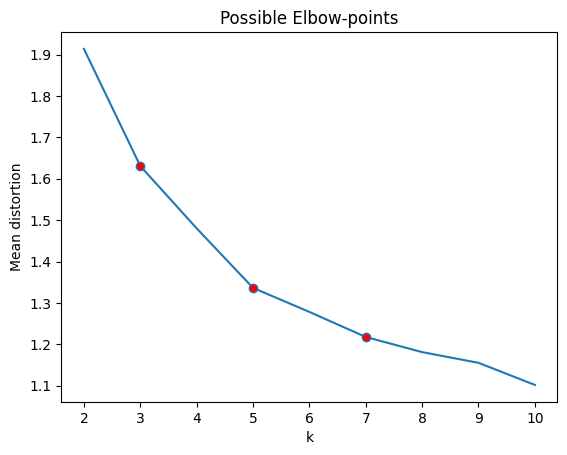

In [260]:
plt.plot(n_clusters, mean_distortions, marker='o', mfc='red', markevery=[1, 3, 5])
plt.xlabel('k')
plt.ylabel('Mean distortion')
plt.title('Possible Elbow-points');

 * Either k = 3 or k = 5 are strong candidates for the optimal number of clusters based on this elbow method plot, with k = 7 as a secondary option depending on the analysis goals.

Using Silhouette co-efficient to choose the optimal number of clusters.

In [261]:
# Finding silhouette co-efficient with clusters 3, 5 and 7
for k in [3, 5, 7]:
    model = KMeans(n_clusters=k)
    model.fit(car_df_scaled)
    print(f'Silhouette co-efficient (k={k}):', metrics.silhouette_score(car_df_scaled, model.labels_))

Silhouette co-efficient (k=3): 0.32424799220774553
Silhouette co-efficient (k=5): 0.33296973781495653
Silhouette co-efficient (k=7): 0.32800059482520755


 * k=5 has got better value than other two k values

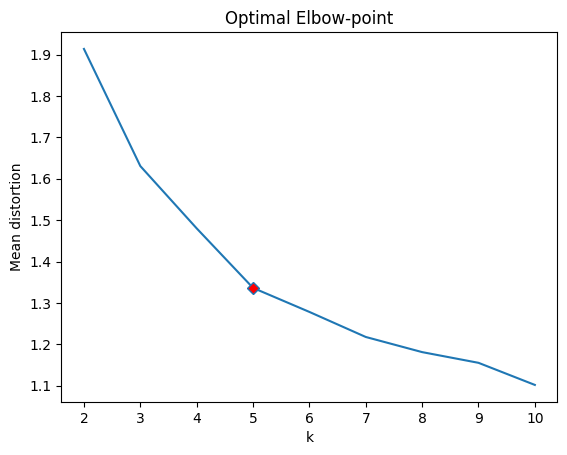

In [262]:
plt.plot(n_clusters, mean_distortions, marker='D', mfc='red', markevery=[3])
plt.xlabel('k')
plt.ylabel('Mean distortion')
plt.title('Optimal Elbow-point');

* Plot also shows the same indicating k=5 is the optimal value

In [263]:
# K-Means clustering model with optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(car_df_scaled)

KMeans(n_clusters=5, random_state=1)

### E.Add a new feature in the DataFrame which will have labels based upon cluster value

In [264]:
# Adding K-Means cluster labels to the cars dataset
car_df2['kmeans_cluster'] = kmeans.labels_
car_df2.sample(5)

car_name   mpg  cyl   disp    hp    wt   acc  yr  \
82   toyouta corona mark ii (sw)  23.0    4  120.0  97.0  2506  14.5  72   
81               datsun 510 (sw)  28.0    4   97.0  92.0  2288  17.0  72   
366       chrysler lebaron salon  17.6    6  225.0  85.0  3465  16.6  81   
132               chevrolet vega  25.0    4  140.0  75.0  2542  17.0  74   
205               toyota corolla  28.0    4   97.0  75.0  2155  16.4  76   

     origin  kmeans_cluster  
82        3               1  
81        3               1  
366       1               0  
132       1               1  
205       3               4

### F.Plot a visual and color the datapoints based upon clusters. 

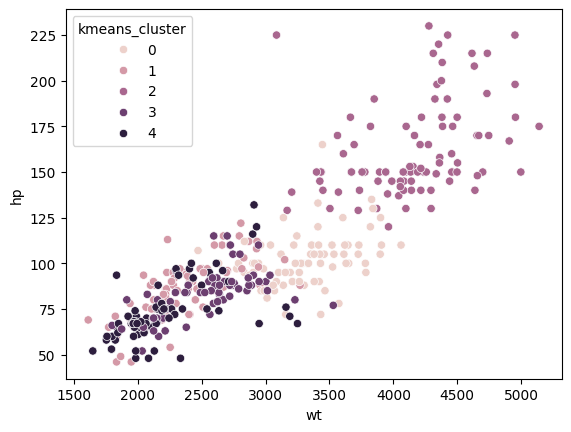

In [265]:
# Scatter plot
sns.scatterplot(car_df2, x='wt', y='hp', hue='kmeans_cluster');

### G. Pass a new DataPoint and predict which cluster it belongs to

* Using K-Means clustering algorithm, the dataset on cars has been classified into 5 clusters based on various given features.

In [266]:
# Generating a synthetic record by randomly sampling values for each of the numeric attributes
np.random.seed(1)
# Assuming you have the feature names from your training data
feature_names = ['mpg', 'cyl', 'disp','hp','wt','acc','yr','origin'] 
syn_df = pd.DataFrame()
for attr in car_df_scaled.columns:
    if car_df2[attr].dtype == np.int64:
        syn_df[attr] = [np.random.randint(car_df2[attr].min(), car_df2[attr].max())]
    else:
        syn_df[attr] = [np.random.uniform(car_df2[attr].min(), car_df2[attr].max())]

syn_df.head()

mpg  cyl        disp         hp    wt        acc  yr  origin
0  24.680027    7  428.899698  69.574898  4508  11.966295  71       1

In [267]:
# Standardization as we have done earlier
syn_df_scaled = pd.DataFrame(car_df_scaler.transform(syn_df), columns=feature_names)


In [268]:
# Now you can make predictions
prediction = kmeans.predict(syn_df_scaled)[0]
prediction

2

* The created new dataframe was belonged to Cluster 2

## PART B

### DOMAIN: Automobile
### CONTEXT: 
* The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.
### DATA DESCRIPTION: 
* The data contains features extracted from the silhouette of vehicles in different angles.
* Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars.
* This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
* All the features are numeric i.e. geometric features extracted from the silhouette.
### PROJECT OBJECTIVE: 
* Apply dimensionality reduction technique – PCA and train a model and compare relative results.


## 1. Data Understanding & Cleaning

### A. Read ‘vehicle.csv’ and save as DataFrame.

In [269]:
#Read csv file to a dataframe
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [270]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [271]:
rows, column = vehicle_df.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 846 rows and 19 columns.


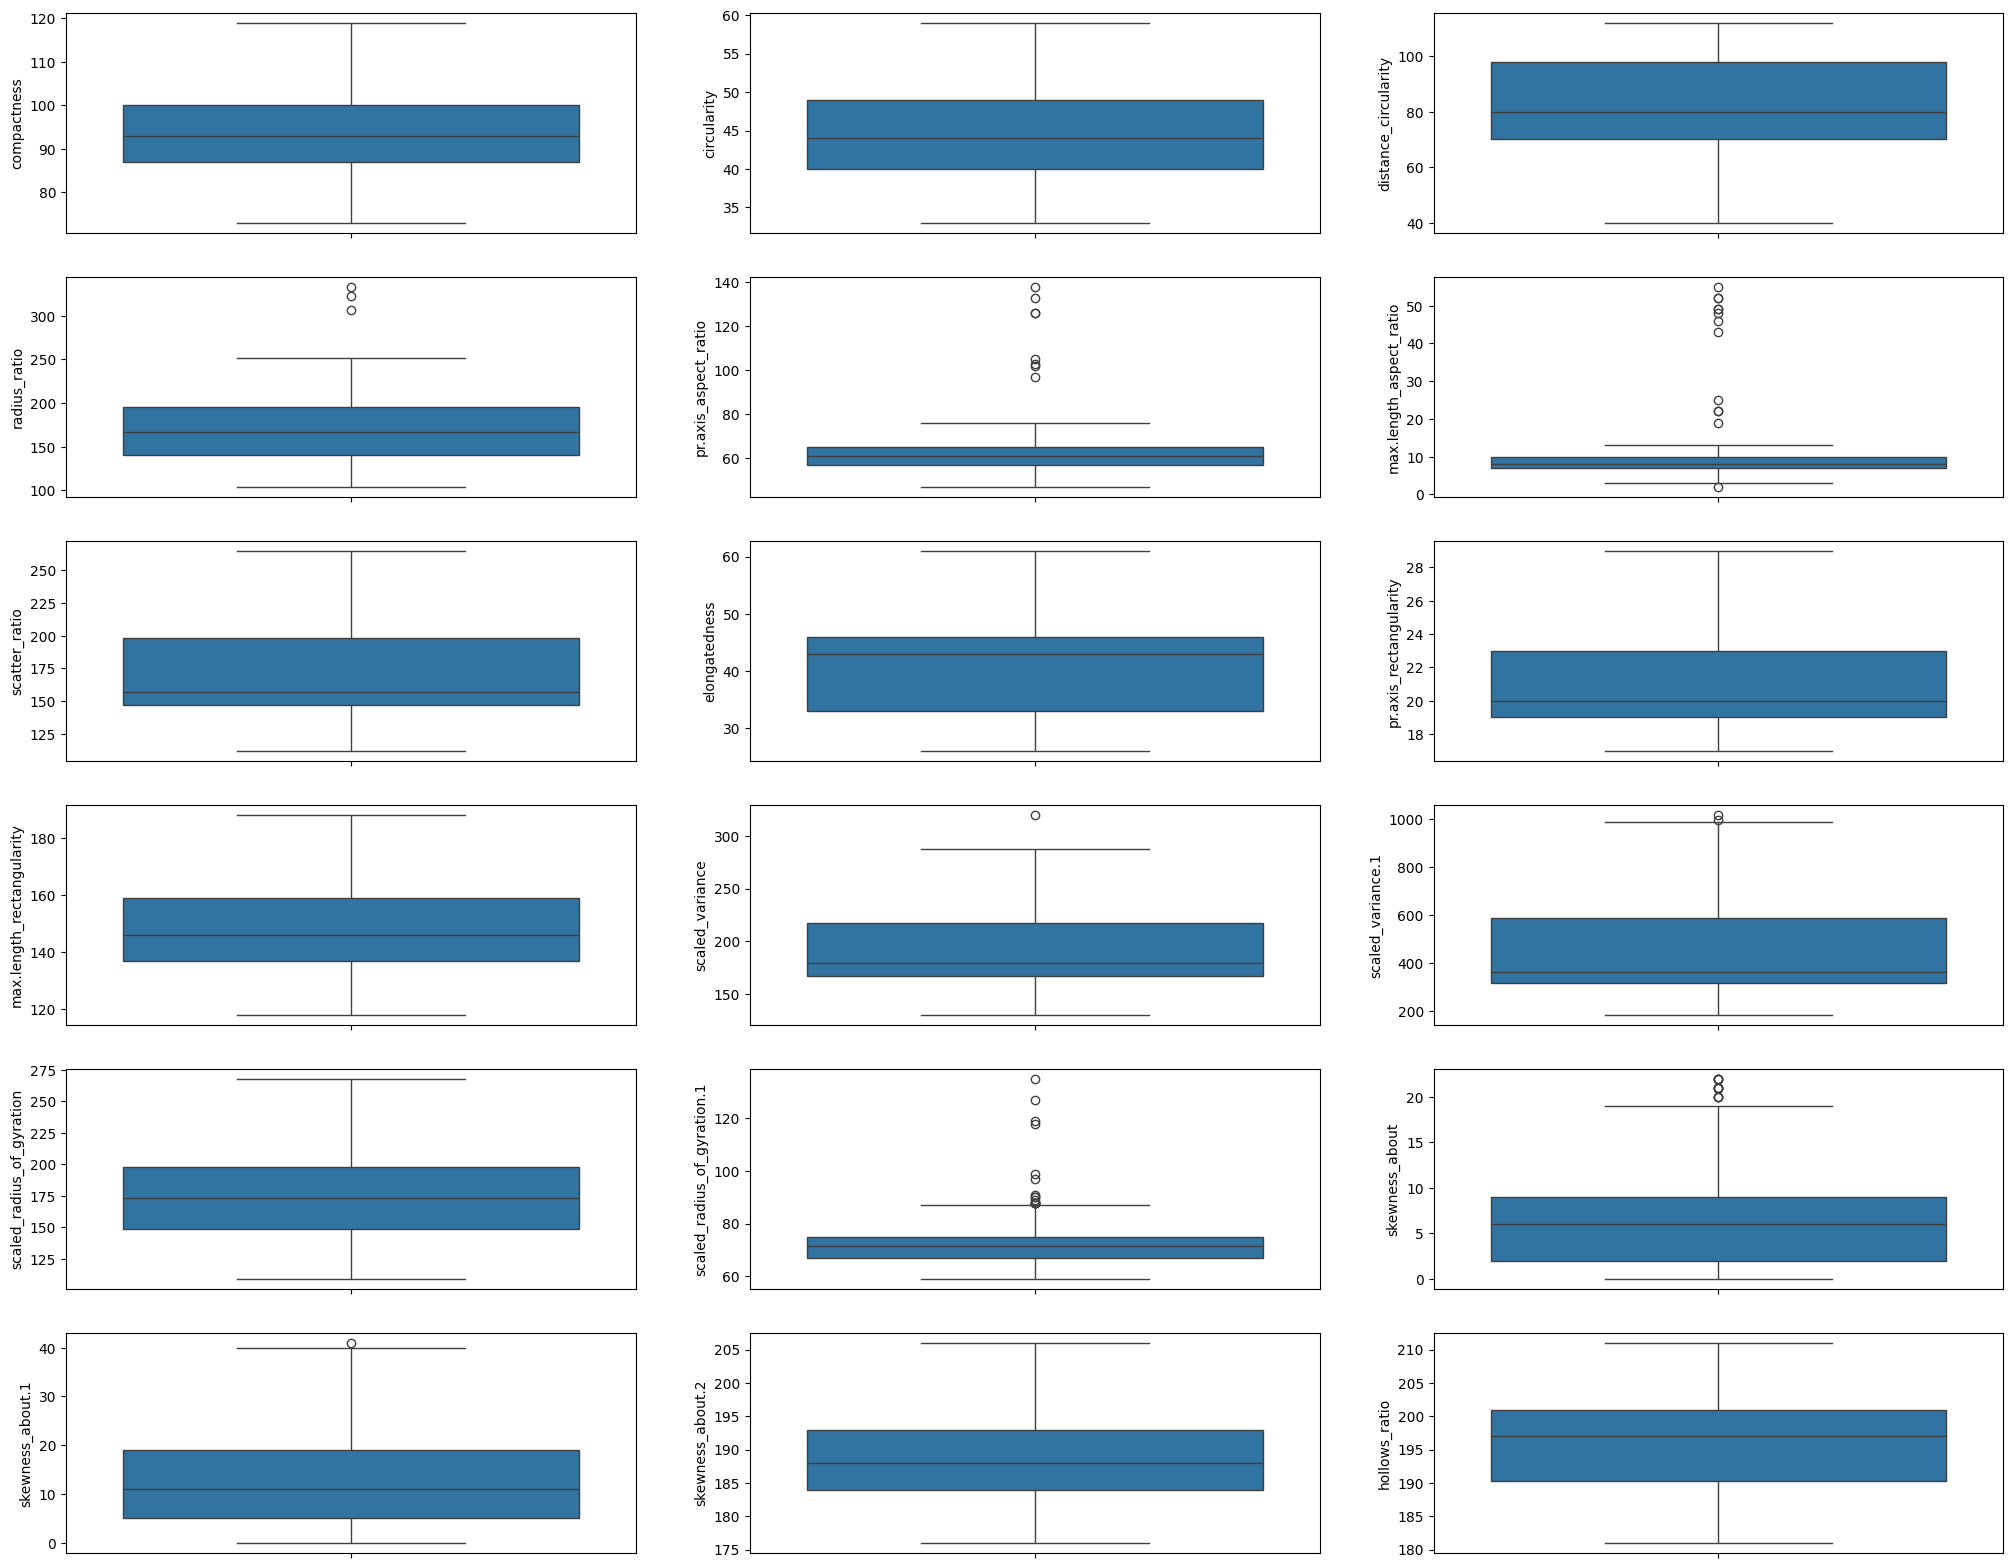

In [272]:
#Boxplots- to check for outliers
plt.figure(figsize=(25, 20))
col = 1
for i in vehicle_df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.boxplot(vehicle_df[i])
    col += 1 

### B.Check percentage of missing values and impute with correct approach. 

In [273]:
missing_percentage =vehicle_df.isnull().mean() * 100
print("Feature-wise Percentage of Missing Values:\n", missing_percentage)

Feature-wise Percentage of Missing Values:
 compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


* There are many missing values, lets try to replace nulls

In [274]:
vehicle_df1 = vehicle_df.replace([' ','?'],np.nan)
missing_val_col = vehicle_df1.columns[vehicle_df1.isnull().any()].tolist()
missing_val_col

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

In [275]:
#Replace all missing columns with median/mode for imputation
for col in missing_val_col:
    vehicle_df1[col] = vehicle_df1[col].fillna(vehicle_df1[col].median())

In [276]:
#Now check percentage of missing values
missing_percentage =vehicle_df1.isnull().mean() * 100
print("Feature-wise Percentage of Missing Values:\n", missing_percentage)

Feature-wise Percentage of Missing Values:
 compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64


* All columns are normalised not to have missing values

### C.Visualize a Pie-chart and print percentage of values for variable ‘class’.

<Axes: >

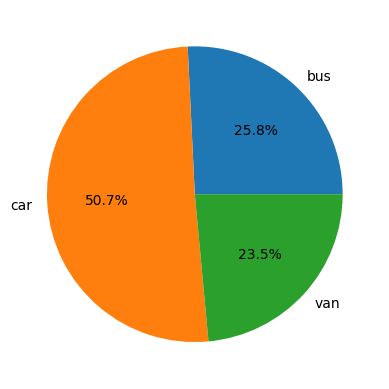

In [277]:
vehicle_df1.groupby('class').size().plot(kind='pie',autopct='%1.1f%%')

### D.Check for duplicate rows in the data and impute with correct approach

In [278]:
vehicle_df1.duplicated().sum()

0

* There are no duplicates

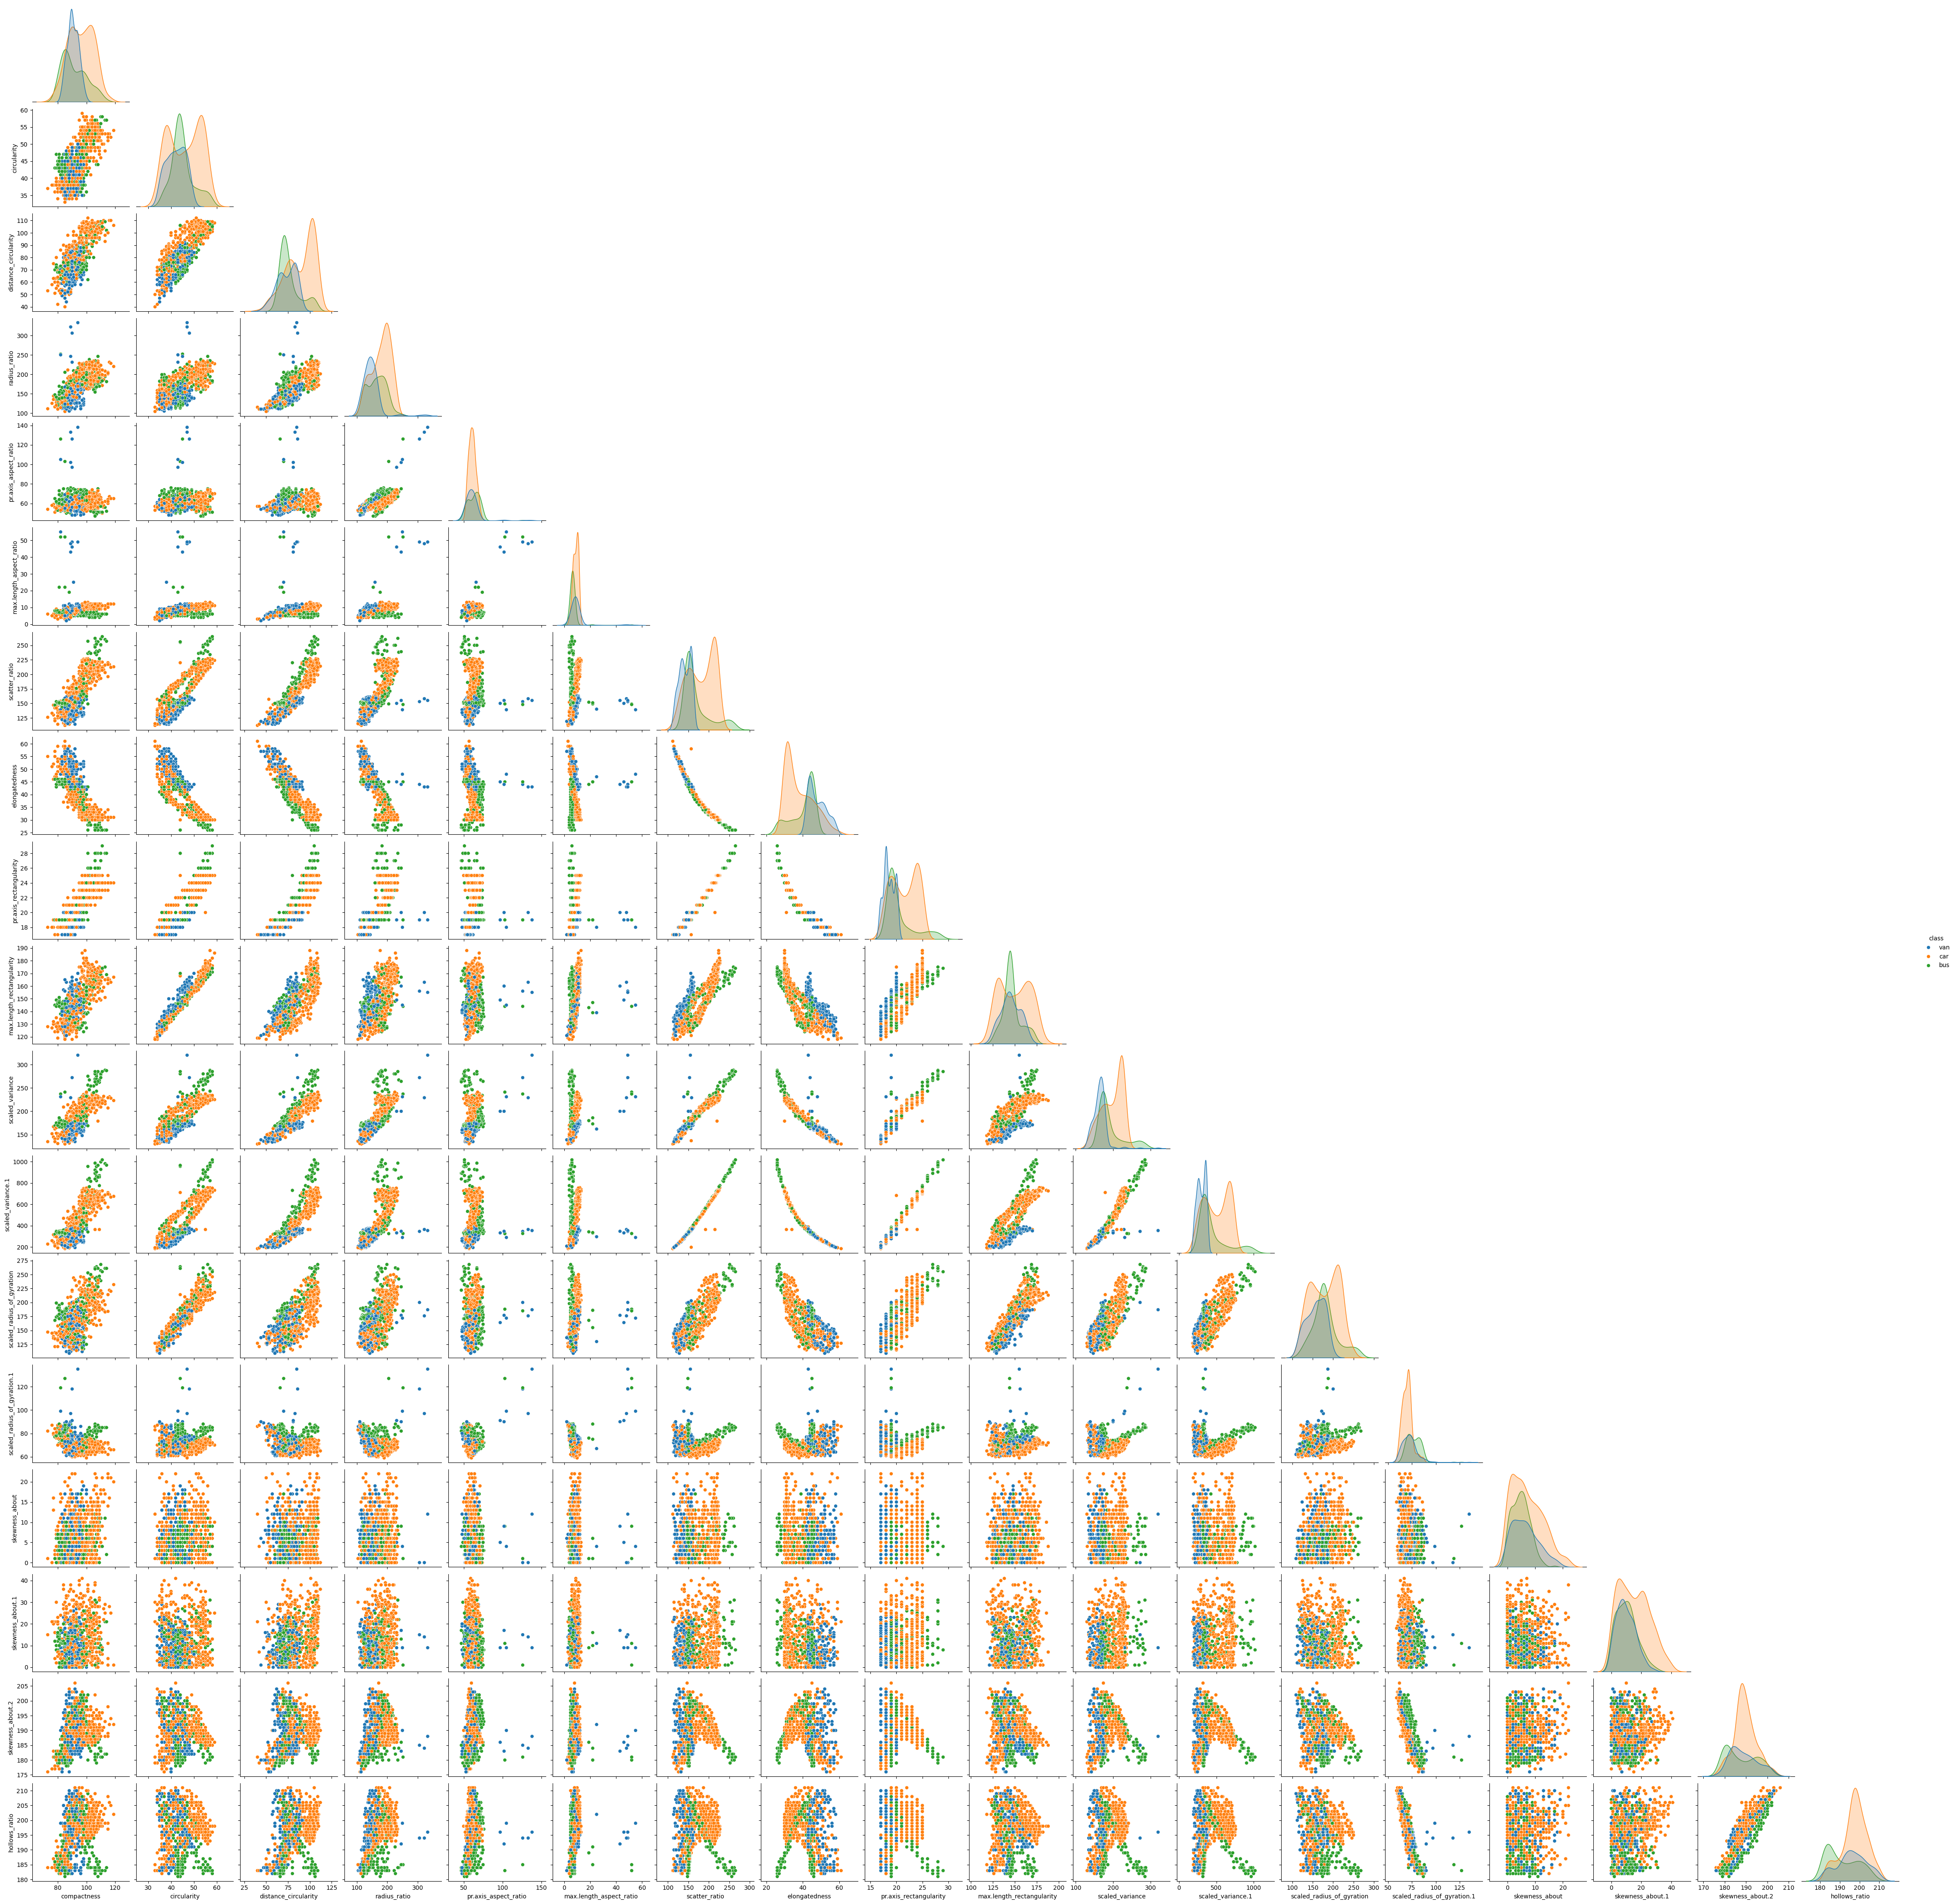

In [279]:
#Draw pairplot to understand data distribution
sns.pairplot(data=vehicle_df1, hue = 'class', diag_kind = 'kde', corner = True);

## 2. Data Preparation

### A.Split data into X and Y

In [280]:
#understand data and columns
vehicle_df1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [281]:
#drop the class object
X = vehicle_df1.drop(['class'], axis = 1)
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [282]:
Y = vehicle_df1['class']
Y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

In [283]:
# Test and Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((676, 18), (170, 18), (676,), (170,))

### B.Standardize the Data

In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.581861     0.342899              0.042356      4.503746   
1    -1.550674    -0.148202             -0.649855     -0.894152   
2     0.023647     0.342899              0.168212      4.828210   
3     0.992460     1.488802              1.112135     -0.186231   
4     0.386952     1.652502              0.860422      0.020246   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              8.714319                 8.151668      -0.342929   
1             -0.214036                -0.541322      -0.492452   
2              9.325850                 8.358643      -0.432643   
3             -1.070179                 0.286582       1.301821   
4             -0.947873                 0.286582       1.391534   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.278004               -0.237311                   1.033734   
1       0.405501               -0.621097                  -0.150562   
2       0.278004               -0.621097                   0.476418   
3      -1.251960                1.297833                   1.730378   
4      -1.251960                1.297833                   1.730378   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         1.248347          -0.439164                   0.012915   
1        -0.290095          -0.534559                   0.074077   
2         4.105453          -0.495278                   0.349302   
3         0.934379           1.272334                   0.777430   
4         0.934379           1.362117                   1.297301   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     3.160152       -1.295902          0.160019   
1                     1.090757       -1.088803          0.270625   
2                     8.074967        1.189289         -0.393012   
3                     0.444071        1.189289          1.597899   
4                     0.314733       -1.295902         -0.946043   

   skewness_about.2  hollows_ratio  
0         -0.797977      -0.216177  
1         -1.125302      -1.280920  
2         -0.143326       0.050008  
3         -0.306989      -0.083085  
4         -0.797977      -0.349270

In [285]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
normalized_x_test.head()

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.460760     0.179199             -0.461070     -1.071132   
1     1.840172     1.161401              0.797494      0.580684   
2     0.750257    -0.639303             -0.461070      1.052631   
3     0.750257     0.670300             -0.146429      1.082128   
4     0.144749    -0.475603              0.860422      0.816657   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.825567                 0.493558      -0.283120   
1             -0.458648                -0.955274       1.720484   
2              1.131333                -0.748298       0.195353   
3              1.009026                -0.541322       0.404684   
4              0.397495                 0.079606       0.255162   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.278004               -0.237311                   0.894405   
1      -1.506954                1.681619                   0.685412   
2      -0.614475                0.146475                  -0.707877   
3      -0.741972                0.146475                   0.546083   
4      -0.486978                0.146475                  -0.498884   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.509872          -0.411106                  -0.139988   
1         2.284440           1.872761                   1.266720   
2         0.463428           0.206155                  -0.751600   
3         0.526221           0.419391                   0.685689   
4         0.306444           0.178098                  -0.812761   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.573408       -1.295902          0.381231   
1                     1.220094       -1.295902          0.713050   
2                    -0.073278        0.153793          0.713050   
3                     0.056059       -0.674604          0.049413   
4                    -0.719964       -1.088803          1.819112   

   skewness_about.2  hollows_ratio  
0         -1.125302      -0.482363  
1         -0.306989      -1.280920  
2          1.329638       0.183101  
3          1.493301       0.449287  
4          0.674987       0.582379

## 3. Model Building

### A.Train a base Classification model using SVM.

In [286]:
from sklearn.svm import SVC

svc = SVC(random_state = 111)
svc.fit(normalized_x_train, y_train)

SVC(random_state=111)

### B. Print Classification metrics for train data

In [287]:
from sklearn.metrics import classification_report
svc_y_pred = svc.predict(normalized_x_test)

print("Training accuracy is: ",svc.score(normalized_x_train, y_train))
print("Test accuracy is: ",svc.score(normalized_x_test, y_test))

Training accuracy is:  0.9807692307692307
Test accuracy is:  0.9588235294117647


In [288]:
svc_y_pred_train = svc.predict(normalized_x_train)
target_names = ['car','bus','van']
print(classification_report(y_train, svc_y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

         car       0.99      0.98      0.98       181
         bus       0.99      0.99      0.99       339
         van       0.96      0.97      0.96       156

    accuracy                           0.98       676
   macro avg       0.98      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



Confusion Matrix for Training Data


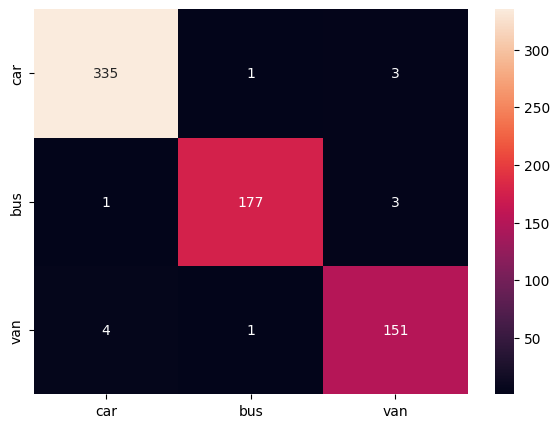

In [289]:
from sklearn import metrics

print("Confusion Matrix for Training Data")
cm=metrics.confusion_matrix(y_train, svc_y_pred_train, labels=['car','bus','van'])
df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

In [290]:
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_error
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, svc_y_pred, average = 'macro')
modelSVC_score = svc.score(normalized_x_train, y_train)
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score)

Precision Score : 0.95
Recall Score : 0.96
F1-Score : 0.96
Accuracy Score : 0.98


### C.Apply PCA on the data with 10 components

In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(normalized_x_train)

PCA(n_components=10)

### D. Visualize Cumulative Variance Explained with Number of Components.

In [292]:
import numpy as np

cov_matrix = np.cov(normalized_x_train.T) 
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)


Covariance Matrix 
%s [[ 1.00148148  0.68288411  0.79149453  0.68221511  0.07748053  0.13316939
   0.8106164  -0.78343778  0.81335796  0.67885892  0.75201699  0.81156943
   0.58192296 -0.25159836  0.229138    0.15275846  0.29866555  0.36744677]
 [ 0.68288411  1.00148148  0.79503591  0.61942336  0.14679522  0.23267596
   0.8469733  -0.82379955  0.84071063  0.96173383  0.79377977  0.83368356
   0.92369871  0.039593    0.1429656  -0.00771439 -0.09878982  0.05325642]
 [ 0.79149453  0.79503591  1.00148148  0.76657766  0.14923539  0.24461215
   0.90538129 -0.91396383  0.89409918  0.77803025  0.85775358  0.88577319
   0.7081183  -0.23534514  0.11472585  0.27280808  0.1599696   0.34671282]
 [ 0.68221511  0.61942336  0.76657766  1.00148148  0.66226494  0.46031202
   0.72605683 -0.7809903   0.70097597  0.56768292  0.79376668  0.70900597
   0.5329057  -0.16148913  0.04224024  0.17440558  0.38355712  0.47782313]
 [ 0.07748053  0.14679522  0.14923539  0.66226494  1.00148148  0.6777896
   0.08645814

In [293]:
# Get the cumulative variance explained
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 51.98806456  68.59124406  79.63516122  86.2940129   91.24101338
  94.17167982  96.14351873  97.34724886  98.2462091   98.73208009
  99.09133107  99.34890617  99.54468792  99.70227631  99.82313263
  99.92090716  99.98060873 100.        ]


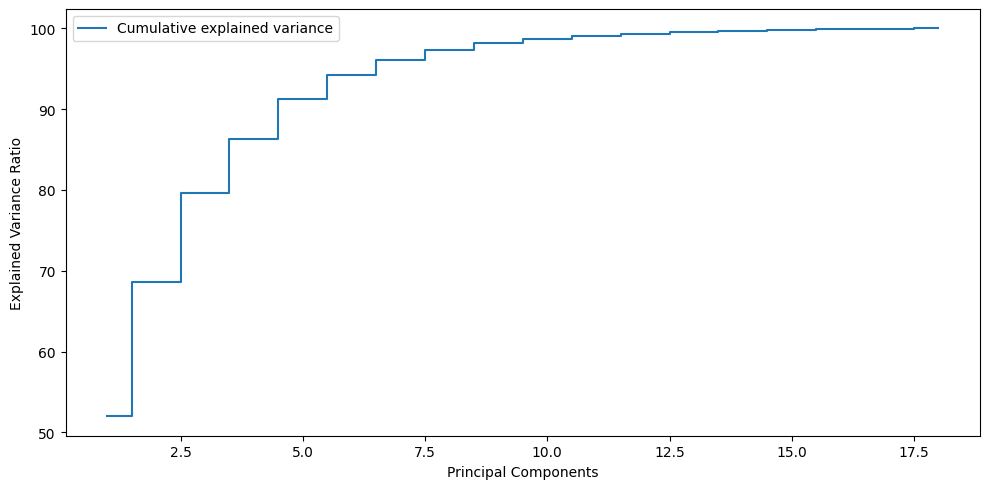

In [294]:
plt.figure(figsize=(10 , 5))
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### E. Draw a horizontal line on the above plot to highlight the threshold of 90%

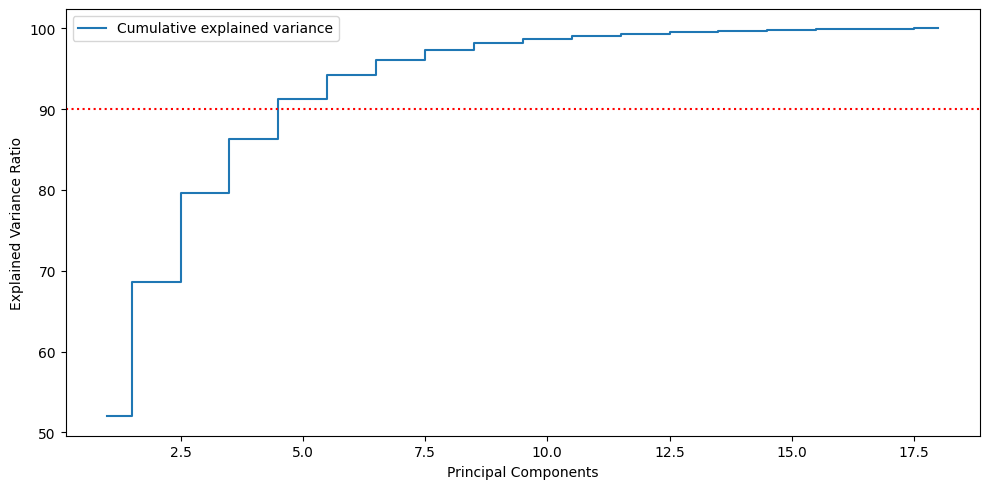

In [295]:
plt.figure(figsize=(10 , 5))
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.axhline(90, 0, 20, color='red', linestyle='dotted')
plt.tight_layout()
plt.show()

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [296]:
#train new model
pca1 = PCA(n_components=5)
pca1.fit(normalized_x_train)

PCA(n_components=5)

In [297]:
df_comp1 = pd.DataFrame(pca1.components_,columns=list(normalized_x_train))
df_comp1.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.274888     0.293598              0.305711      0.266495   
1    -0.127067     0.122994             -0.079504     -0.187492   
2    -0.113153    -0.026457             -0.054280      0.280987   
3     0.084399     0.179769             -0.065280     -0.036218   
4     0.068182    -0.095534              0.046048     -0.041552   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.076370                 0.091408       0.317433   
1             -0.113499                 0.010593       0.048796   
2              0.635259                 0.591631      -0.097273   
3              0.038596                 0.026506      -0.095282   
4             -0.038952                 0.191874      -0.009093   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.314703                0.314289                   0.283602   
1       0.012550                0.059539                   0.114355   
2       0.058511               -0.109356                  -0.022522   
3       0.082996               -0.092100                   0.177955   
4       0.074615                0.009736                  -0.078700   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.308902           0.313958                   0.272633   
1         0.067432           0.055878                   0.212453   
2         0.071807          -0.107367                  -0.034399   
3        -0.116870          -0.090528                   0.195978   
4         0.010981          -0.010887                  -0.066677   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.021911        0.039859          0.059175   
1                     0.484249       -0.048729         -0.131170   
2                     0.297675       -0.107633         -0.071976   
3                    -0.062690        0.620639         -0.658192   
4                     0.152632        0.726120          0.605098   

   skewness_about.2  hollows_ratio  
0          0.031228       0.075474  
1         -0.542112      -0.542521  
2          0.016783       0.046256  
3          0.108360       0.048318  
4         -0.096631      -0.037324

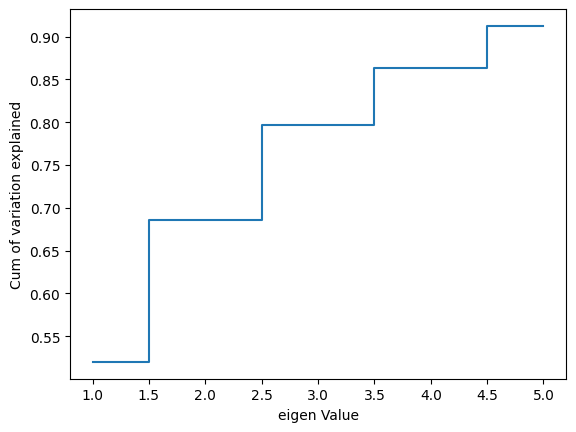

In [298]:
plt.step(list(range(1,6)),np.cumsum(pca1.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [299]:
pca1_df = pca1.transform(normalized_x_train)
pca1_df

array([[ 2.68537705,  0.64116145, 12.91249858, -0.64761694,  0.64822571],
       [-1.9147351 ,  2.16057348,  0.02840605, -1.00360621, -0.44545286],
       [ 3.6910727 ,  2.42832137, 14.96075092,  0.77651727,  2.89508444],
       ...,
       [ 0.04455944, -1.53445229, -0.06406939, -1.69880018,  0.15417026],
       [-0.5943903 ,  1.66176658, -0.16665303, -0.38560996, -0.53003688],
       [ 2.8432663 ,  2.18778344, 13.29098139, -0.88750177,  1.22038393]])

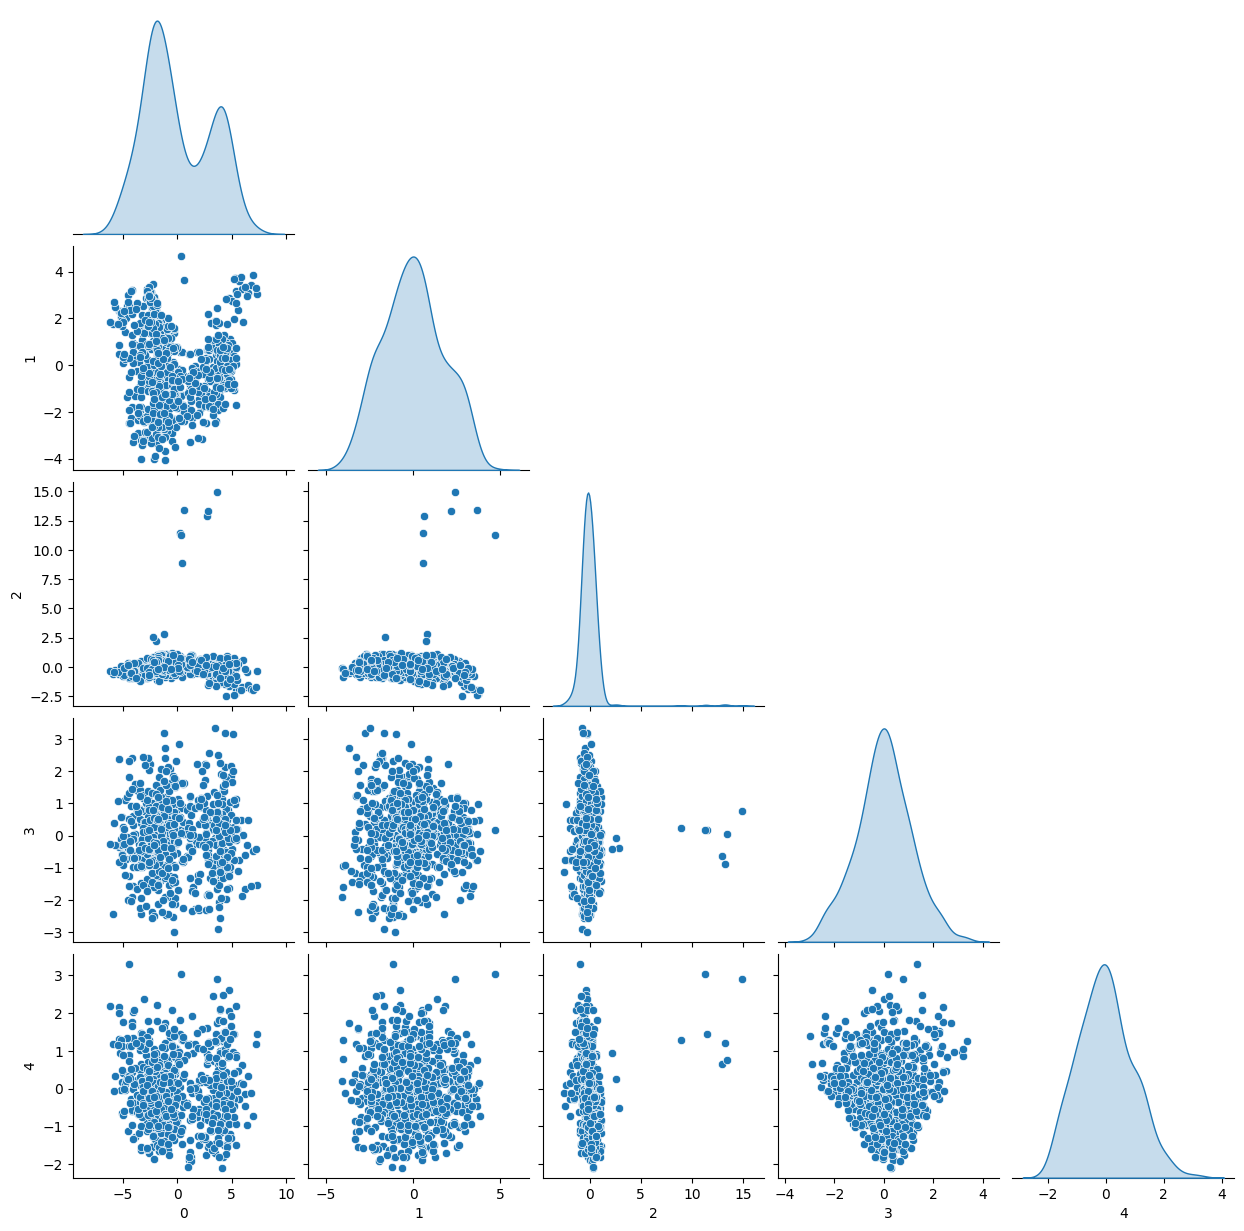

In [300]:
sns.pairplot(pd.DataFrame(pca1_df), diag_kind = 'kde', corner = True);

### G. Train SVM model on components selected from above step.

In [301]:
svc1 = SVC(random_state = 111)
svc1.fit(pca1_df, y_train)

print("Training accuracy is: ",svc1.score(pca1_df, y_train))

Training accuracy is:  0.7973372781065089


### E. Print Classification metrics for train data of above model and share insights

In [302]:
svc1_y_pred_train = svc1.predict(pca1_df)

target_names = ['car','bus','van']
print(classification_report(y_train, svc1_y_pred_train, target_names=target_names))



              precision    recall  f1-score   support

         car       0.82      0.70      0.75       181
         bus       0.85      0.87      0.86       339
         van       0.67      0.76      0.71       156

    accuracy                           0.80       676
   macro avg       0.78      0.77      0.78       676
weighted avg       0.80      0.80      0.80       676



* Overall Accuracy: The model has an accuracy of 80%, indicating good overall performance.
* Best Performing Class: The bus class shows the highest precision (0.85), recall (0.87), and F1-score (0.86), making it the strongest class for the model.
* Challenging Class: The van class has the lowest precision (0.67), recall (0.76), and F1-score (0.71), suggesting it is the most challenging for the model to classify accurately.
* Balanced Performance: Macro average metrics (precision: 0.78, recall: 0.77, F1-score: 0.78) reflect balanced performance across classes, treating each class equally.
* Weighted Performance: Weighted averages (precision: 0.80, recall: 0.80, F1-score: 0.80) indicate the model performs well when considering class imbalances.
* Improvement Areas: Focus on enhancing classification for the van class through additional data or model adjustments to achieve more balanced performance.

Confusion Matrix for Training Data with PCA


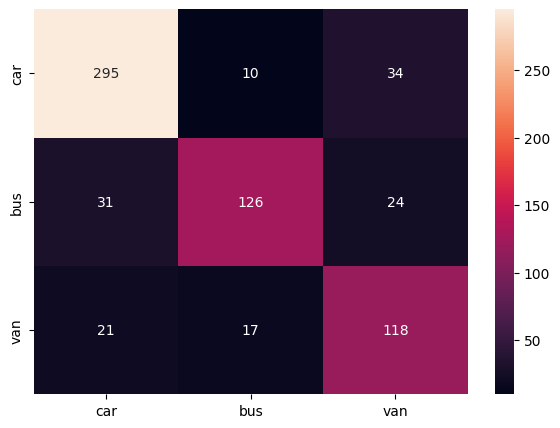

In [303]:
print("Confusion Matrix for Training Data with PCA")

cm=metrics.confusion_matrix(y_train, svc1_y_pred_train, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])

plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

In [304]:
precision_pca, recall_pca, f1_score_pca, support = precision_recall_fscore_support(y_train, svc1_y_pred_train, average = 'macro')
model_pca_score = accuracy_score(svc1_y_pred_train, y_train)
print('Precision Score :', '%0.2f' % precision_pca)
print('Recall Score :', '%0.2f' % recall_pca)
print('F1-Score :', '%0.2f' % f1_score_pca)
print('Accuracy Score :','%0.2f' % model_pca_score)

Precision Score : 0.78
Recall Score : 0.77
F1-Score : 0.78
Accuracy Score : 0.80


## 4. Performance Improvement

### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

[LibSVM]*.*
optimization finished, #iter = 601
obj = -477.764188, rho = 0.897826
nSV = 166, nBSV = 118
.*
optimization finished, #iter = 515
obj = -601.766985, rho = 0.173120
nSV = 134, nBSV = 85
.*
optimization finished, #iter = 648
obj = -524.153441, rho = -0.484564
nSV = 166, nBSV = 124
Total nSV = 358
              precision    recall  f1-score   support

         car       0.83      0.86      0.85       181
         bus       0.96      0.83      0.89       339
         van       0.73      0.91      0.81       156

    accuracy                           0.86       676
   macro avg       0.84      0.87      0.85       676
weighted avg       0.87      0.86      0.86       676

Confusion Matrix for Training Data with PCA


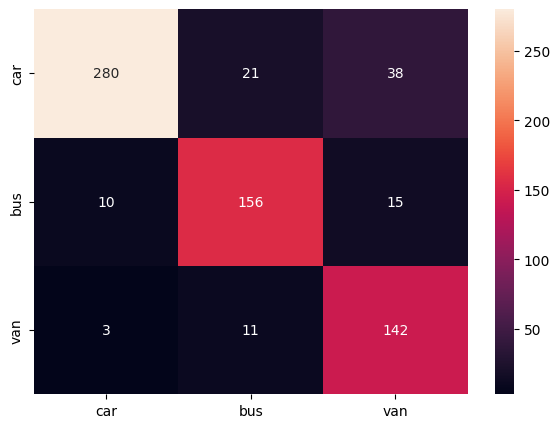

In [305]:
clf = SVC(gamma=0.1, C=5, random_state=111, kernel='rbf', class_weight='balanced', verbose=3)
clf.fit(pca1_data, y_train)
clf_y_pred_train = clf.predict(pca1_df)

print(classification_report(y_train, clf_y_pred_train, target_names=target_names))

from sklearn.metrics import accuracy_score, confusion_matrix

print("Confusion Matrix for Training Data with PCA")

cm=metrics.confusion_matrix(y_train, clf_y_pred_train, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])

plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

In [306]:
precision_svm_withoutpca, recall_svm_withoutpca, f1_score_svm_withoutpca, support = precision_recall_fscore_support(y_train, clf_y_pred_train, average = 'macro')
model_svm_withoutpca = accuracy_score(clf_y_pred_train, y_train)
print('Precision Score :', '%0.2f' % precision_svm_withoutpca)
print('Recall Score :', '%0.2f' % recall_svm_withoutpca)
print('F1-Score :', '%0.2f' % f1_score_svm_withoutpca)
print('Accuracy Score :','%0.2f' % model_svm_withoutpca)

Precision Score : 0.84
Recall Score : 0.87
F1-Score : 0.85
Accuracy Score : 0.86


In [307]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'],
              }
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(pca1_df, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.691 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

### B. Share best Parameters observed from above step.

In [308]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [309]:
grid_predictions = grid.predict(pca1_df)

print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

         bus       0.89      0.86      0.87       181
         car       0.91      0.94      0.92       339
         van       0.84      0.82      0.83       156

    accuracy                           0.89       676
   macro avg       0.88      0.87      0.87       676
weighted avg       0.89      0.89      0.89       676



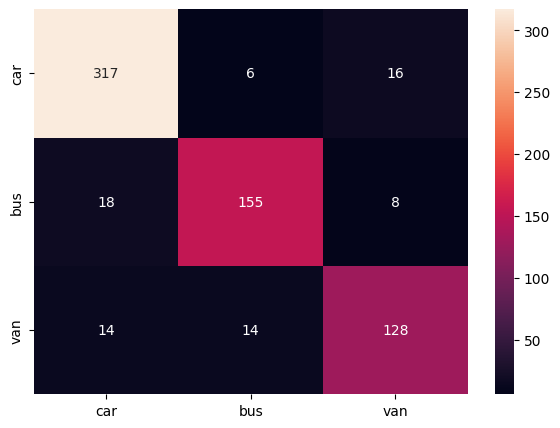

In [310]:

cm=metrics.confusion_matrix(y_train, grid_predictions, labels=['car','bus','van'])

df_cm = pd.DataFrame(cm, index = [i for i in ['car','bus','van']],
                  columns = [i for i in ['car','bus','van']])

plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt = 'g');

In [311]:
precision_gs, recall_gs, f1_score_gs, support = precision_recall_fscore_support(y_train, grid_predictions, average = 'macro')
model_gs = accuracy_score(grid_predictions, y_train)
print('Precision Score :', '%0.2f' % precision_gs)
print('Recall Score :', '%0.2f' % recall_gs)
print('F1-Score :', '%0.2f' % f1_score_gs)
print('Accuracy Score :','%0.2f' % model_gs)

Precision Score : 0.88
Recall Score : 0.87
F1-Score : 0.87
Accuracy Score : 0.89


In [312]:

modellists = []
modellists.append(['SVC with PCA', model_pca_score * 100, recall_pca * 100, precision_pca * 100])
modellists.append(['SVC using Grid Search', model_gs * 100,  recall_gs * 100, precision_gs * 100])
modellists.append(['SVC with PCA using GridSearch', modelSVC_score * 100,  recall_SVC * 100, precision_SVC * 100])
modellists.append(['SVC without PCA', model_svm_withoutpca * 100, recall_svm_withoutpca * 100, precision_svm_withoutpca * 100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score',  'Recall Score', 'Precision Score'])
model_df

Model  Accuracy Score  Recall Score  \
0                   SVC with PCA       79.733728     77.424978   
1          SVC using Grid Search       88.757396     87.065655   
2  SVC with PCA using GridSearch       98.076923     96.067230   
3                SVC without PCA       85.502959     86.603119   

   Precision Score  
0        78.137602  
1        87.870967  
2        95.378560  
3        83.787459

Text(0.5, 1.0, 'Comparison of Classification Models')

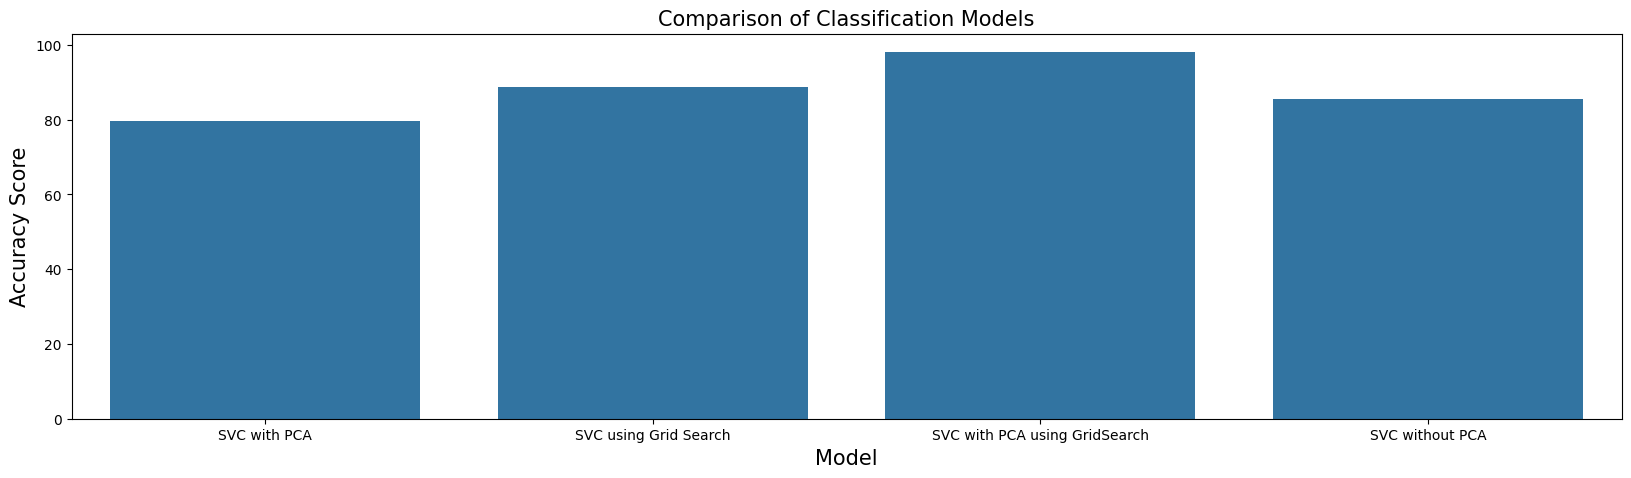

In [313]:
plt.figure(figsize = (20, 5))
sns.barplot(x = model_df['Model'], y = model_df['Accuracy Score'], data = model_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)


* Accuracy is increased when we use SVC with PCA using Grid Search

## 5.Data Understanding & Cleaning

### A. Explain pre-requisite/assumptions of PCA.

#### Pre-requisites:
* Mean-Centered Data: The data must be centered by subtracting the mean of each feature so that each feature has a mean of zero.
* Feature Scaling: Features should be scaled or normalized to ensure that variables with different units or ranges do not disproportionately affect the PCA results.
* Linearity: PCA assumes that the relationships between features are linear, making it suitable for datasets where linearity is a valid assumption.
* Covariance Structure: The covariance matrix of the data should reflect meaningful variance and relationships between features, as PCA relies on this structure to identify principal components.
* Large Sample Size: A larger sample size is recommended for stable and reliable PCA results, as it provides a more accurate estimation of the covariance matrix.

#### Assumptions:
* Linearity: PCA assumes that the data structure is linear, meaning it captures the variance along linear combinations of the original features.
* Mean-Centered Data: PCA assumes that the data has been mean-centered so that each feature has a mean of zero, which is necessary for accurate calculation of principal components.
* Feature Variance: PCA assumes that the variance in the data is significant and that the principal components are directions along which the data varies the most.
* Covariance Structure: PCA assumes that the covariance matrix of the data accurately represents the relationships and variability among features.
* Independence of Components: PCA assumes that the principal components are orthogonal (uncorrelated) to each other, meaning each component captures unique variance in the data.








### B.Explain advantages and limitations of PCA

#### Advantages:
* Dimensionality Reduction: PCA reduces the number of features by transforming them into a smaller set of principal components, making data analysis and visualization more manageable.
* Variance Capture: PCA captures the most significant variance in the data, allowing for a more efficient representation that retains the essential information while discarding less important features.
* Noise Reduction: By focusing on the principal components with the highest variance, PCA can help reduce the impact of noise and less informative features, improving model performance.
* Data Visualization: PCA facilitates visualization of high-dimensional data by projecting it into lower dimensions (e.g., 2D or 3D), making it easier to explore and interpret complex datasets.
* Feature Correlation: PCA helps identify and address correlations between features by transforming correlated variables into a set of uncorrelated principal components, which can simplify the analysis and modeling process.

### Disadvantages:
* Linearity Assumption: PCA assumes linear relationships between features, which may not capture complex, non-linear patterns in the data.
* Interpretability: The principal components are linear combinations of the original features, which can make it difficult to interpret or understand the meaning of these new components.
* Variance Focus: PCA prioritizes variance, which may not always align with the most meaningful or relevant aspects of the data for specific applications.
* Sensitivity to Scaling: PCA is sensitive to the scale of the features, requiring careful scaling or normalization of the data to ensure accurate results.
* Loss of Information: Reducing the dimensionality of the data may result in the loss of some information, potentially impacting the performance of downstream analyses or models.






